In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [88]:
# Load data from a CSV file into a pandas DataFrame named 'df'

df = pd.read_csv('Data.csv')

In [89]:
# Display the first 5 rows of the DataFrame 'df'

df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,9.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [90]:
df['Label'].value_counts() * 100 / len(df)

,count
Label,
b,65.7332
s,34.2668


In [91]:
# Display the last 5 rows of the DataFrame 'df'

df.tail()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
249995,349995,-999.000,71.989,36.548,5.042,-999.0,-999.0,-999.0,1.392,5.042,...,0,-999.000,-999.0,-999.000,-999.0,-999.0,-999.0,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.0,-999.0,-999.0,2.585,22.439,...,0,-999.000,-999.0,-999.000,-999.0,-999.0,-999.0,0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.0,-999.0,-999.0,2.390,22.183,...,1,41.992,1.8,-0.166,-999.0,-999.0,-999.0,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.0,-999.0,-999.0,3.365,13.504,...,0,-999.000,-999.0,-999.000,-999.0,-999.0,-999.0,0.000,1.681611,b
249999,349999,-999.000,72.756,70.831,7.479,-999.0,-999.0,-999.0,2.025,7.479,...,0,-999.000,-999.0,-999.000,-999.0,-999.0,-999.0,0.000,1.877474,b


In [92]:
# Retrieve the dimensions (number of rows, number of columns) of the DataFrame 'df'.

df.shape

(250000, 33)

In [10]:
# Display a concise summary of the DataFrame 'df', including data types, non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76600 entries, 0 to 76599
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EventId                      76600 non-null  int64  
 1   DER_mass_MMC                 76600 non-null  float64
 2   DER_mass_transverse_met_lep  76600 non-null  float64
 3   DER_mass_vis                 76600 non-null  float64
 4   DER_pt_h                     76600 non-null  float64
 5   DER_deltaeta_jet_jet         76600 non-null  float64
 6   DER_mass_jet_jet             76600 non-null  float64
 7   DER_prodeta_jet_jet          76600 non-null  float64
 8   DER_deltar_tau_lep           76600 non-null  float64
 9   DER_pt_tot                   76600 non-null  float64
 10  DER_sum_pt                   76600 non-null  float64
 11  DER_pt_ratio_lep_tau         76600 non-null  float64
 12  DER_met_phi_centrality       76600 non-null  float64
 13  DER_lep_eta_cent

In [11]:
# Generate descriptive statistics for the numerical columns in the DataFrame 'df'.

df.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,76600.000000,76600.000000,76600.000000,76600.000000,76600.000000,76600.000000,76600.000000,76600.000000,76600.000000,76600.000000,...,76599.000000,76599.000000,76599.000000,76599.000000,76599.000000,76599.000000,76599.000000,76599.000000,76599.000000,76599.000000
mean,138299.500000,-49.562176,49.487667,81.287866,57.808292,-707.326361,-599.955002,-708.274584,2.375207,18.977914,...,209.817737,0.981566,-348.587183,-399.412950,-399.417070,-691.189641,-708.039729,-708.038168,73.228027,1.654537
std,22112.659647,406.835503,35.474879,40.645770,64.035053,454.985276,658.073818,453.523595,0.784037,24.040781,...,127.178800,0.980355,532.924766,489.371532,489.368229,480.479893,453.883015,453.885186,98.604262,1.877063
min,100000.000000,-999.000000,0.001000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,119149.750000,77.843000,19.397750,59.401750,13.960500,-999.000000,-999.000000,-999.000000,1.813000,2.826000,...,122.560000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,138299.500000,104.928500,46.849000,73.757000,38.283500,-999.000000,-999.000000,-999.000000,2.492000,12.329500,...,179.601000,1.000000,38.789000,-1.873000,-2.084000,-999.000000,-999.000000,-999.000000,40.400000,1.186906
75%,157449.250000,130.538250,73.804250,92.411250,79.188000,0.497000,83.757250,-4.481000,2.963250,27.578250,...,263.040000,2.000000,75.289500,0.429000,0.497000,33.827500,-2.429500,-2.265000,110.199000,2.425590
max,176599.000000,945.555000,690.075000,1051.358000,2834.999000,9.000000,3624.154000,15.790000,5.684000,2834.999000,...,1660.929000,3.000000,1120.573000,4.482000,3.141000,557.180000,4.497000,3.141000,1419.777000,7.817383


In [12]:
# Count the number of missing values in each column of the DataFrame 'df'.

df.isnull().sum()

,0
EventId,0
DER_mass_MMC,0
DER_mass_transverse_met_lep,0
DER_mass_vis,0
DER_pt_h,0
DER_deltaeta_jet_jet,0
DER_mass_jet_jet,0
DER_prodeta_jet_jet,0
DER_deltar_tau_lep,0
DER_pt_tot,0


In [44]:
df.dropna(inplace=True)
df

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,...,2.0,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,...,1.0,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,...,1.0,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,9.000,-999.000,-999.000,3.310,0.414,...,0.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,...,0.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76594,176594,90.932,53.759,54.391,48.445,-999.000,-999.000,-999.000,2.454,20.856,...,1.0,58.007,0.179,-1.046,-999.000,-999.000,-999.000,58.007,0.001503,s
76595,176595,95.845,8.928,65.071,42.950,2.404,109.836,-1.422,2.298,28.978,...,2.0,32.039,1.352,-1.898,30.790,-1.052,0.185,62.829,1.373391,b
76596,176596,97.078,47.728,65.047,110.953,-999.000,-999.000,-999.000,1.793,46.933,...,1.0,111.763,-1.889,0.108,-999.000,-999.000,-999.000,111.763,0.001503,s
76597,176597,-999.000,63.217,38.969,0.565,-999.000,-999.000,-999.000,1.685,0.565,...,0.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,4.732908,b


In [45]:
# Identify duplicate rows in the DataFrame 'df' and printing it

duplicate_values = df.duplicated()
print(duplicate_values.sum())

0


In [46]:
# Creating a list for the number of columns
cols=list(df.columns)
cols

['EventId',
 'DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_deltar_tau_lep',
 'DER_pt_tot',
 'DER_sum_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'DER_lep_eta_centrality',
 'PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi',
 'PRI_jet_all_pt',
 'Weight',
 'Label']

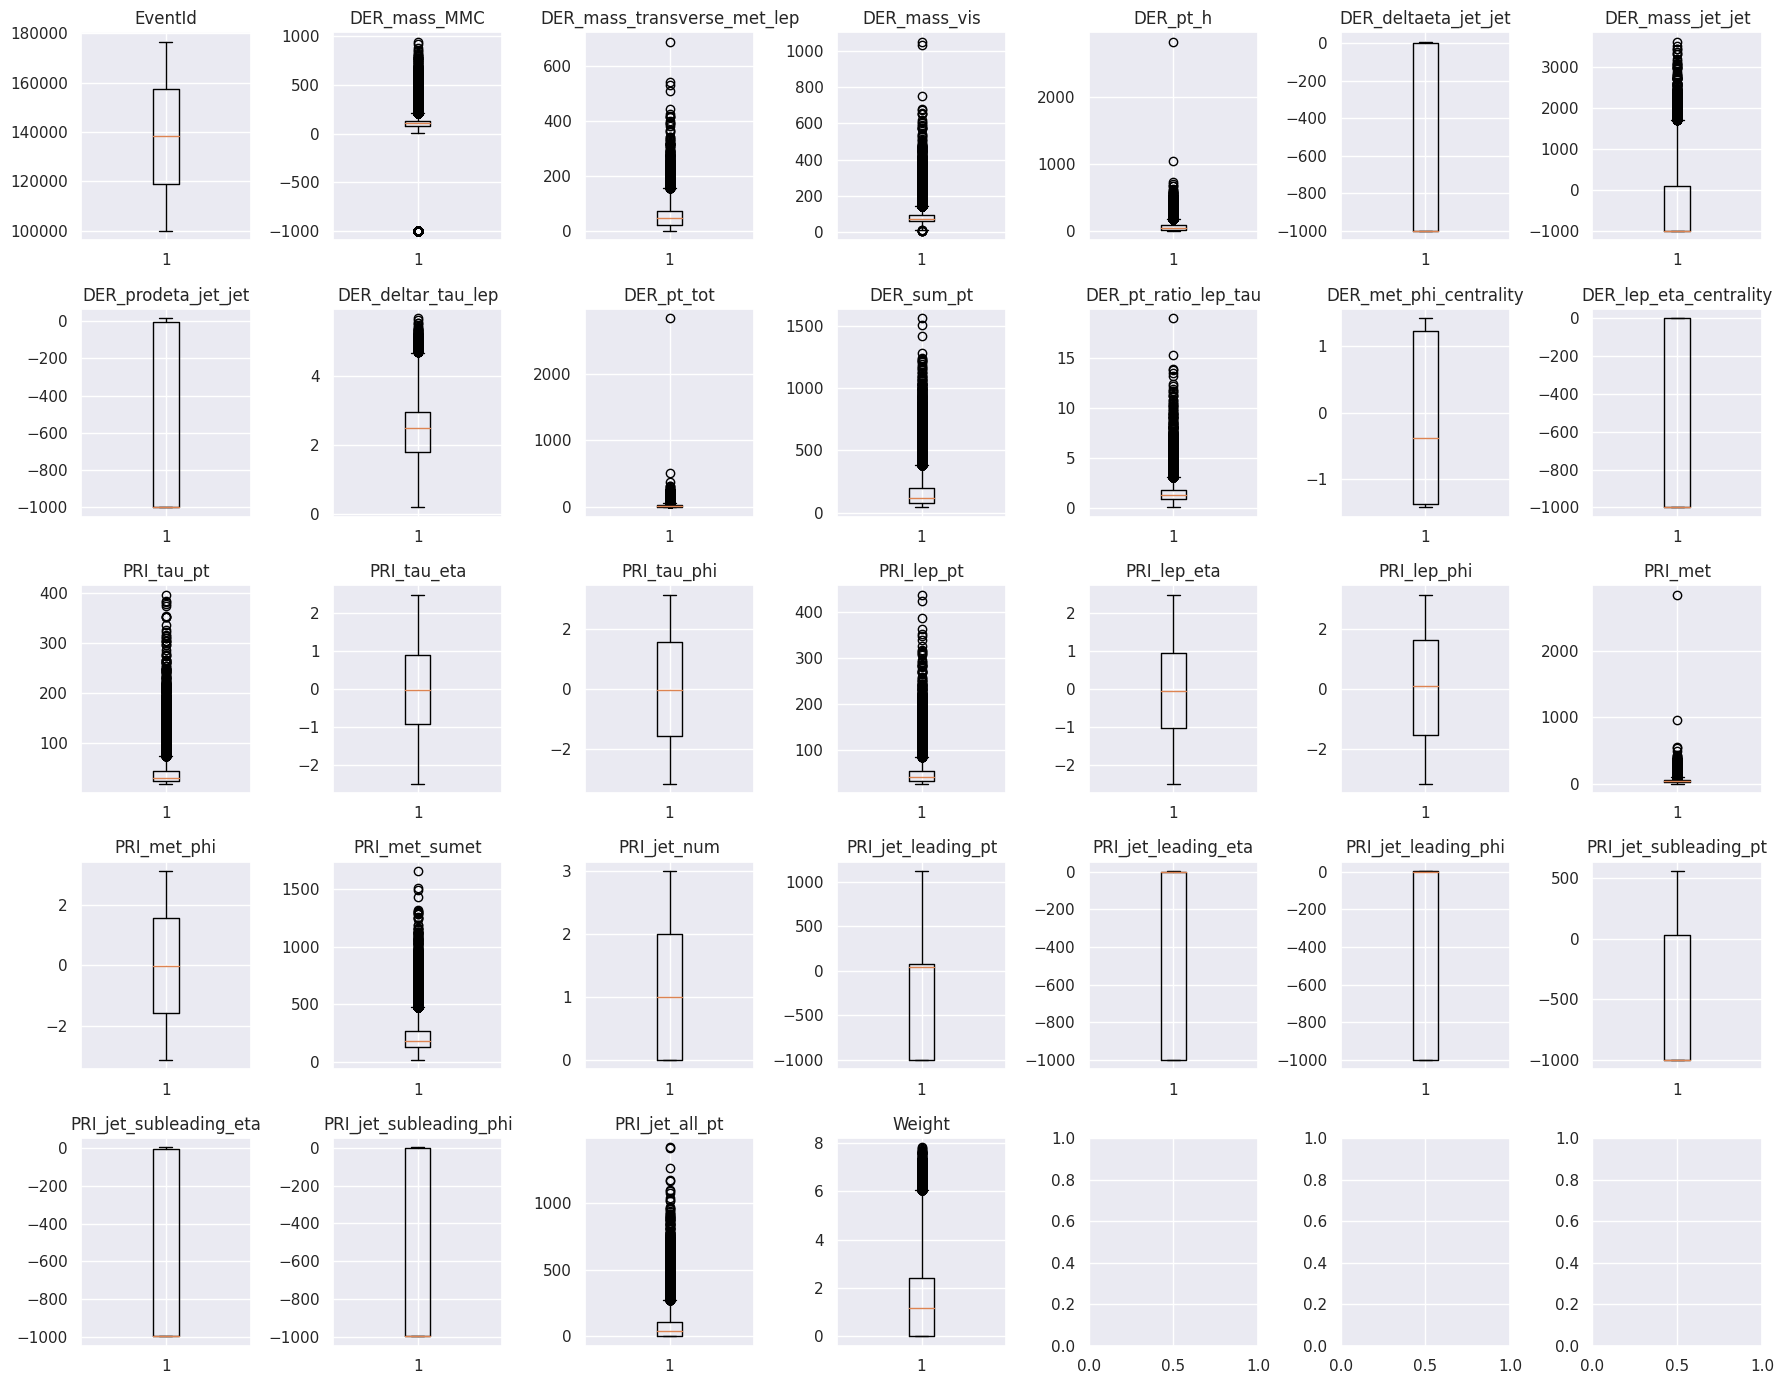

In [47]:
# A grid of subplots containing boxplots for each numerical column in the DataFrame 'df'.
# It provides a visual summary of the distribution of each numerical column's data, including the median, quartiles, and any potential outliers.


f,ax=plt.subplots(5,7,figsize=(18,14),dpi=100)

ind=0
try:
    for i in range(5):
        for j in range(7):
            ax[i,j].boxplot(x=df[cols[ind]])
            ax[i,j].set_title(cols[ind])
            ind+=1
        plt.tight_layout()
except:
    pass
plt.show()

In [48]:
# This code snippet calculates interquartile range (IQR) for numerical columns in the DataFrame df. and is commonly used in exploratory data analysis and outlier detection.

Q1 = df.select_dtypes(exclude='object').quantile(0.25)
Q3 = df.select_dtypes(exclude='object').quantile(0.75)
IQR = Q3 - Q1
print(IQR)

EventId                        38299.000000
DER_mass_MMC                      52.693000
DER_mass_transverse_met_lep       54.406000
DER_mass_vis                      33.009500
DER_pt_h                          65.228000
DER_deltaeta_jet_jet             999.497000
DER_mass_jet_jet                1082.759500
DER_prodeta_jet_jet              994.519000
DER_deltar_tau_lep                 1.150500
DER_pt_tot                        24.752500
DER_sum_pt                       122.677000
DER_pt_ratio_lep_tau               0.892000
DER_met_phi_centrality             2.590000
DER_lep_eta_centrality           999.000000
PRI_tau_pt                        20.467000
PRI_tau_eta                        1.825000
PRI_tau_phi                        3.144000
PRI_lep_pt                        20.953000
PRI_lep_eta                        1.977000
PRI_lep_phi                        3.134000
PRI_met                           30.595500
PRI_met_phi                        3.152000
PRI_met_sumet                   

In [49]:
 # Identify outliers by broadcasting the lower and upper bounds across the DataFrame

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = (df.select_dtypes(exclude='object') > upper_bound) | (df.select_dtypes(exclude='object') < lower_bound)

print(outliers)


       EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  \
0        False         False                        False         False   
1        False         False                        False         False   
2        False          True                         True         False   
3        False         False                        False         False   
4        False         False                        False         False   
...        ...           ...                          ...           ...   
76594    False         False                        False         False   
76595    False         False                        False         False   
76596    False         False                        False         False   
76597    False          True                        False         False   
76598    False         False                        False         False   

       DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0         False    

In [50]:
#Cap outliers at both upper and lower limits along columns (axis=1)

df_capped = df.select_dtypes(exclude='object').clip(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR, axis=1)
df_capped

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
0,100000,138.470,51.6550,97.827,27.980,0.910,124.711,2.666,3.064,41.928,...,258.733,2.0,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653
1,100001,160.937,68.7680,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,...,164.546,1.0,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226,2.233584
2,100002,-1.194,155.4125,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,...,260.414,1.0,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251,2.347389
3,100003,143.905,81.4170,80.943,0.414,9.000,-999.000,-999.000,3.310,0.414,...,86.062,0.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,5.446378
4,100004,175.864,16.9150,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,...,53.131,0.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,6.036020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76594,176594,90.932,53.7590,54.391,48.445,-999.000,-999.000,-999.000,2.454,20.856,...,197.122,1.0,58.007,0.179,-1.046,-999.000,-999.000,-999.000,58.007,0.001503
76595,176595,95.845,8.9280,65.071,42.950,2.404,109.836,-1.422,2.298,28.978,...,166.262,2.0,32.039,1.352,-1.898,30.790,-1.052,0.185,62.829,1.373391
76596,176596,97.078,47.7280,65.047,110.953,-999.000,-999.000,-999.000,1.793,46.933,...,311.684,1.0,111.763,-1.889,0.108,-999.000,-999.000,-999.000,111.763,0.001503
76597,176597,-1.194,63.2170,38.969,0.565,-999.000,-999.000,-999.000,1.685,0.565,...,73.898,0.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,4.732908


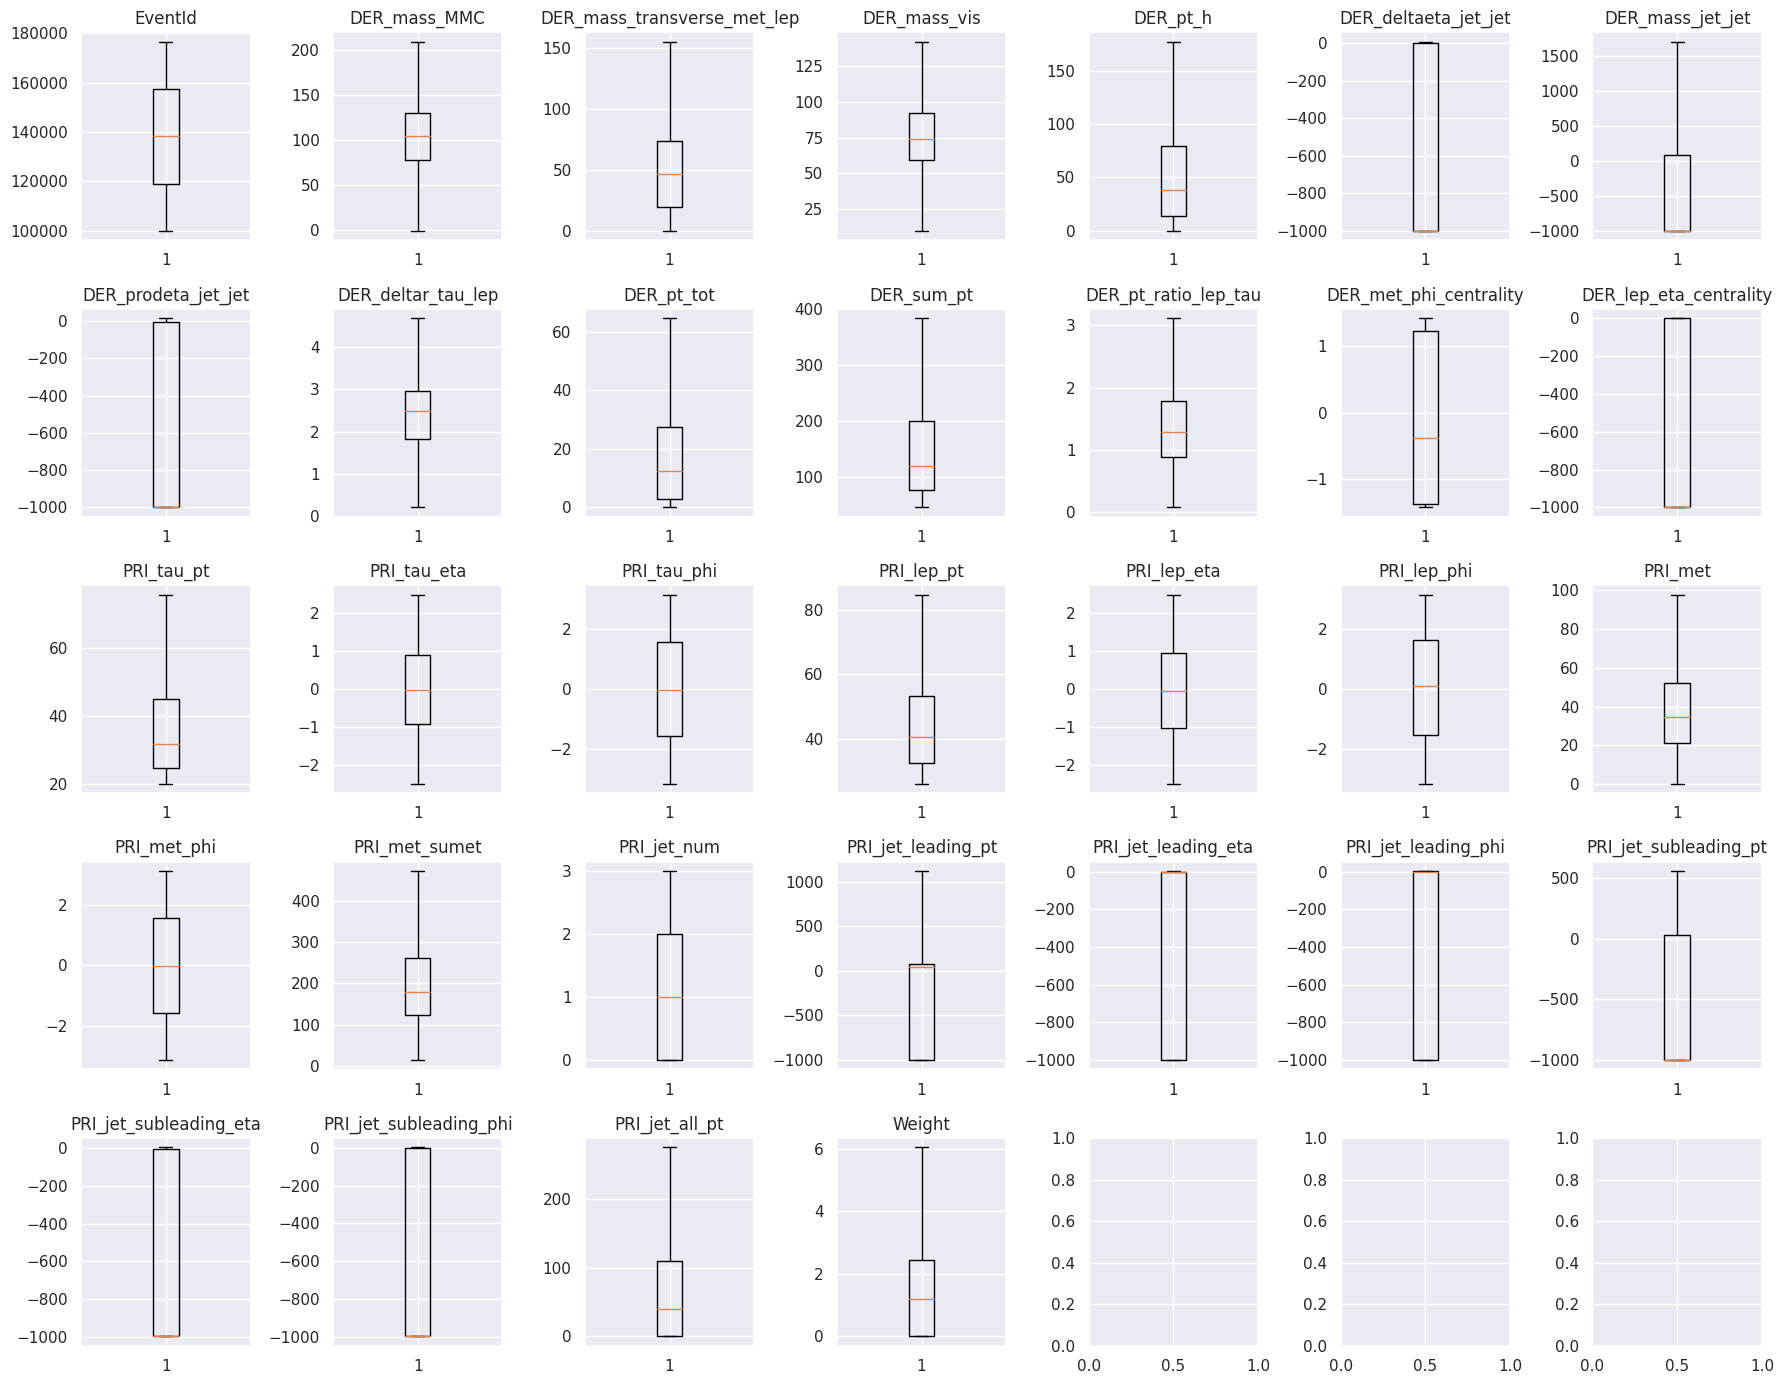

In [51]:
# Checking if the outliers have been removed by plotting boxplots

f,ax=plt.subplots(5,7,figsize=(18,14),dpi=100)

ind=0
try:
    for i in range(5):
        for j in range(7):
            ax[i,j].boxplot(x=df_capped[cols[ind]])
            ax[i,j].set_title(cols[ind])
            ind+=1
        plt.tight_layout()
except:
    pass
plt.show()

In [52]:
# checking skewness
skewness = df_capped.skew()
print("Skewness:", skewness)

Skewness: EventId                        0.000000
DER_mass_MMC                  -0.313045
DER_mass_transverse_met_lep    0.523882
DER_mass_vis                   0.599547
DER_pt_h                       1.062369
DER_deltaeta_jet_jet           0.918843
DER_mass_jet_jet               1.301579
DER_prodeta_jet_jet            0.918958
DER_deltar_tau_lep            -0.232536
DER_pt_tot                     1.025592
DER_sum_pt                     1.098984
DER_pt_ratio_lep_tau           0.767678
DER_met_phi_centrality         0.160929
DER_lep_eta_centrality         0.918900
PRI_tau_pt                     1.105750
PRI_tau_eta                    0.014128
PRI_tau_phi                    0.010119
PRI_lep_pt                     1.041903
PRI_lep_eta                    0.023891
PRI_lep_phi                   -0.047874
PRI_met                        0.856127
PRI_met_phi                    0.008507
PRI_met_sumet                  0.867572
PRI_jet_num                    0.610749
PRI_jet_leading_pt            

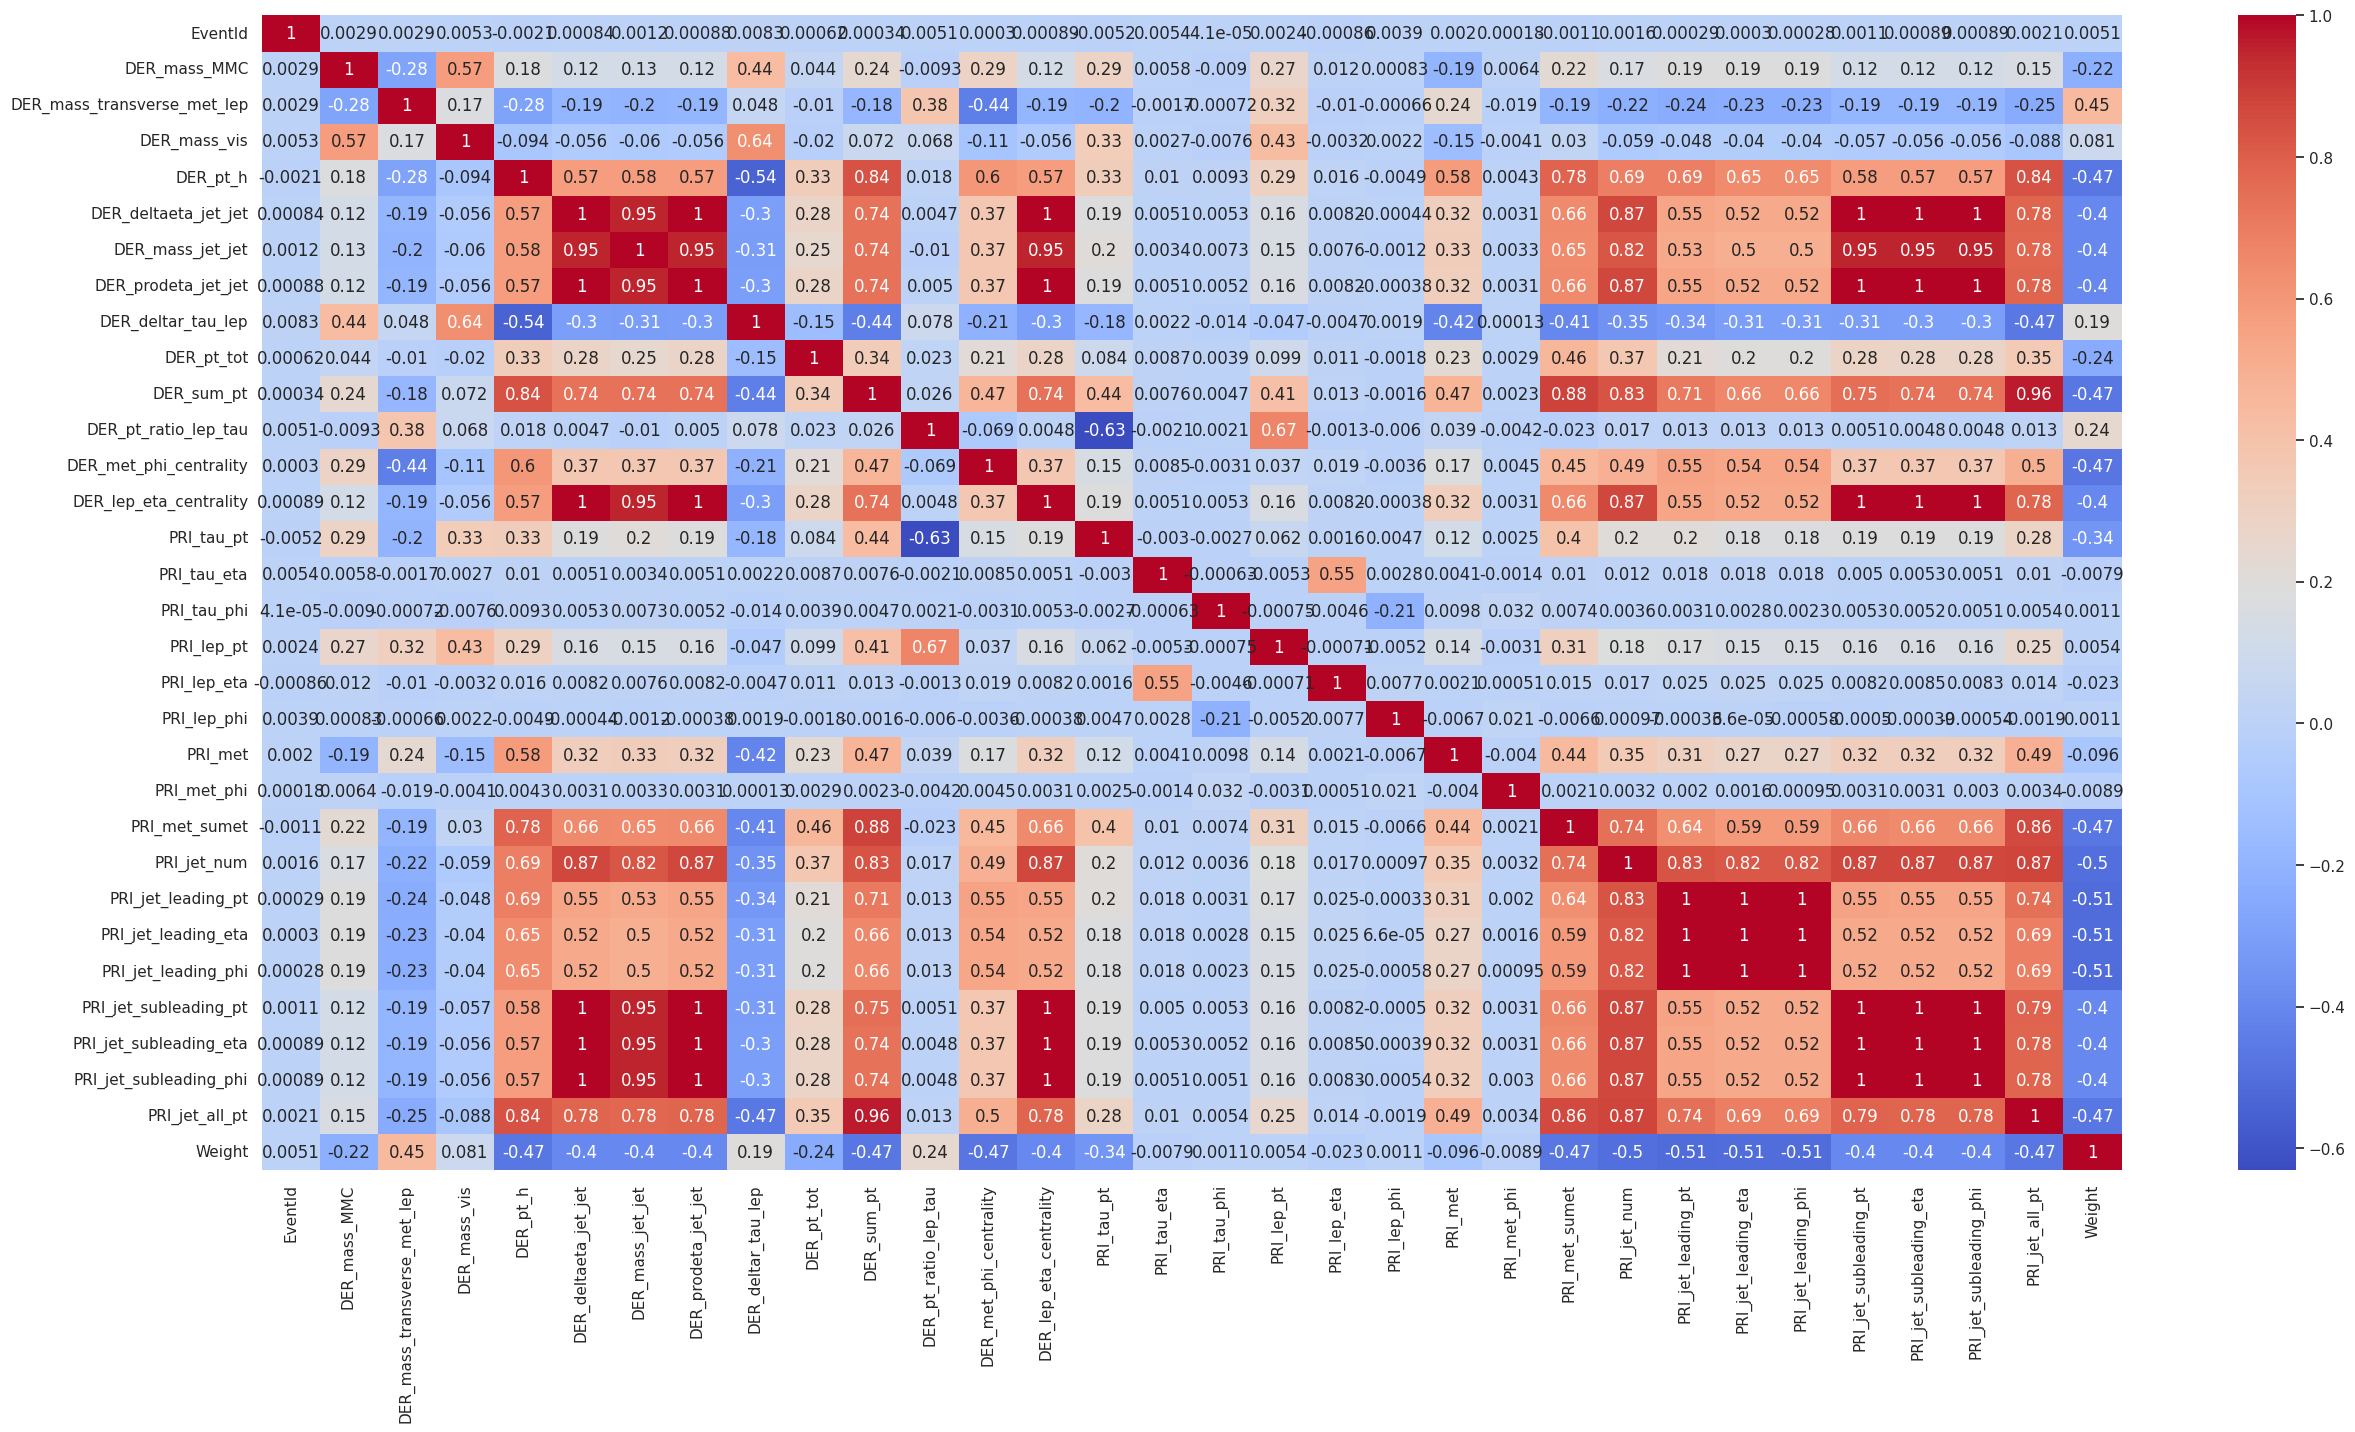

In [53]:
# This visualization is useful for understanding the relationships between different features in the dataset.
# High positive correlations (close to 1) indicate strong positive linear relationships, while high negative correlations (close to -1)
# indicate strong negative linear relationships. A correlation coefficient close to 0 suggests no linear relationship between the variables.

plt.figure(figsize = (30,15))
correlation_matrix = df_capped.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [54]:
#Splitting Data into dependent and independent Variable

In [55]:
# Dropping event column from dataframe since its just representing the identifier for each event.

x = df_capped.drop(['EventId'], axis = 1)

# Taking Target variable as y

y = df['Label']

In [56]:
x.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
0,138.470,51.6550,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,258.733,2.0,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653
1,160.937,68.7680,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,164.546,1.0,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584
2,-1.194,155.4125,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,260.414,1.0,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389
3,143.905,81.4170,80.943,0.414,9.00,-999.000,-999.000,3.310,0.414,75.968,...,86.062,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378
4,175.864,16.9150,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,53.131,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.036020


In [57]:
#Splitting into Train and Test

x_train , x_test , y_train , y_test = train_test_split(x, y,test_size=0.30,random_state=42)

In [58]:
x_train

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
47834,111.325,3.605,73.672,89.963,-999.000,-999.00000,-999.000,3.049,57.825,120.874,...,248.473,1.0,35.925,-2.670,2.141,-999.000,-999.000,-999.000,35.925,0.073899
58624,98.095,6.807,44.730,177.030,0.607,140.99600,3.603,0.853,21.572,359.316,...,367.606,2.0,173.843,1.619,-0.791,83.122,2.226,0.220,256.965,1.454848
21965,144.685,12.919,105.184,31.888,6.430,1707.89875,-9.829,3.178,4.831,255.948,...,335.016,2.0,82.901,2.503,1.632,68.297,-3.928,-1.164,151.197,0.001503
76451,87.292,39.264,60.945,10.309,-999.000,-999.00000,-999.000,3.050,10.309,58.319,...,151.610,0.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,1.454848
51207,36.904,30.582,27.400,62.436,0.698,151.19700,8.933,0.835,2.216,223.411,...,239.797,2.0,90.899,3.358,-0.763,62.507,2.660,1.635,153.407,0.744056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,114.990,42.684,73.513,63.389,-999.000,-999.00000,-999.000,2.851,3.848,120.462,...,173.126,1.0,62.174,2.533,1.290,-999.000,-999.000,-999.000,62.174,0.073899
6265,83.995,60.139,47.480,87.693,-999.000,-999.00000,-999.000,1.523,2.327,161.711,...,171.299,1.0,89.767,-0.758,-2.808,-999.000,-999.000,-999.000,89.767,2.143679
54886,122.183,18.210,82.526,25.524,-999.000,-999.00000,-999.000,3.229,25.524,79.040,...,124.973,0.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,1.681611
860,96.278,66.776,88.282,1.669,-999.000,-999.00000,-999.000,2.766,1.669,55.535,...,153.333,0.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,6.010348


In [59]:
# Calculate the percentage distribution of classes in the y_train set to identify class imbalance

y_train.value_counts() * 100 / len(x_train)

,count
Label,
b,65.631586
s,34.368414


In [60]:
# Checking the count of each unique value in the y_train series.

y_train.value_counts()

,count
Label,
b,35191
s,18428


<Axes: xlabel='count', ylabel='Label'>

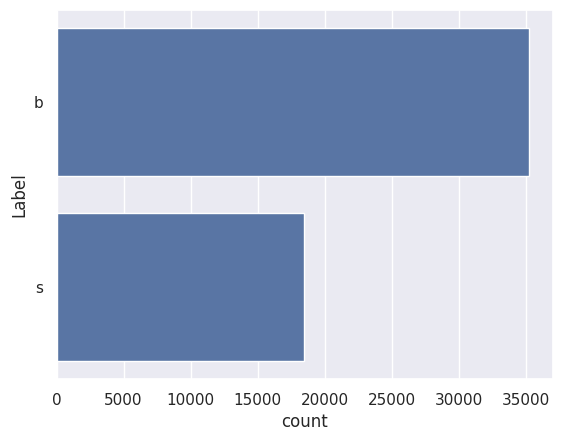

In [61]:
# Plot the count of each unique value in y_train using seaborn's countplot.Since there is no huge class imbalance.Hence no need to treat

sns.countplot(y_train)

In [62]:
# Building Logistic Regression Model

logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [63]:
# Use the trained logistic regression model 'logit_model' to predict the target variable for the training set 'x_train'.

y_pred_train = logit_model.predict(x_train)

# Use the trained logistic regression model 'logit_model' to predict the target variable for the testing set 'x_test'.

y_pred_test = logit_model.predict(x_test)

In [64]:
def model_report(model):
    # Use the provided model to predict the target variable for the training set.
    model_pred_train = model.predict(x_train)

    # Use the provided model to predict the target variable for the testing set.
    model_pred_test = model.predict(x_test)

    # Print the classification report for the predictions on the training set.
    print("Classification Report Train: ")
    print(classification_report(y_train, model_pred_train))

    # Print the classification report for the predictions on the testing set.
    print("Classification Report Test: ")
    print(classification_report(y_test, model_pred_test))

    # Print the accuracy score for the predictions on the training set.
    print("Accuracy Score Train: ", accuracy_score(y_train,model_pred_train))

    # Print the accuracy score for the predictions on the testing set.
    print("Accuracy Score Test: ", accuracy_score(y_test,model_pred_test))

    # Print the confusion matrix for the predictions on the training set.
    print("Confusion Matrix Train: ")
    print(confusion_matrix(y_train,model_pred_train))

    # Print the confusion matrix for the predictions on the testing set.
    print("Confusion Matrix Test: ")
    print(confusion_matrix(y_test,model_pred_test))

In [65]:
# Calling model_report function and passing the logistic regression model (logit_model) as an argument.

model_report(logit_model)

Classification Report Train: 
              precision    recall  f1-score   support

           b       0.79      0.87      0.83     35191
           s       0.69      0.55      0.62     18428

    accuracy                           0.76     53619
   macro avg       0.74      0.71      0.72     53619
weighted avg       0.76      0.76      0.76     53619

Classification Report Test: 
              precision    recall  f1-score   support

           b       0.79      0.87      0.83     15281
           s       0.68      0.55      0.61      7699

    accuracy                           0.76     22980
   macro avg       0.74      0.71      0.72     22980
weighted avg       0.76      0.76      0.76     22980

Accuracy Score Train:  0.7629198604972118
Accuracy Score Test:  0.764012184508268
Confusion Matrix Train: 
[[30696  4495]
 [ 8217 10211]]
Confusion Matrix Test: 
[[13316  1965]
 [ 3458  4241]]


In [66]:
# Import the roc_auc_score function from the metrics module of scikit-learn.
from sklearn.metrics import roc_auc_score

# # Import the make_classification function from the datasets module of scikit-learn.
# from sklearn.datasets import make_classification

In [67]:
y_proba = logit_model.predict_proba(x_test)[:, 1]

In [68]:
# Calculating AUROC

auroc = roc_auc_score(y_test, y_proba)
print("AUROC:", auroc)

AUROC: 0.8332784735509281


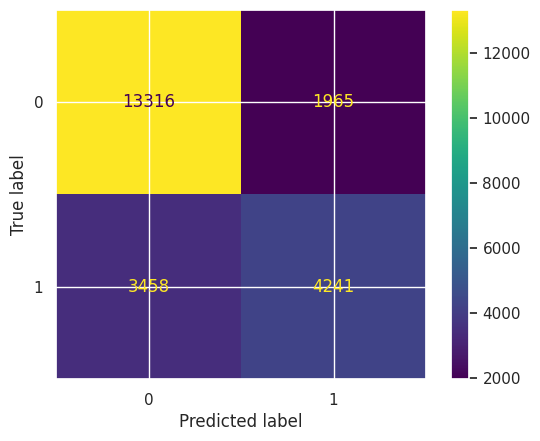

In [69]:
# Plotting confusion matrix to visualize predictions on the testing set

from sklearn.metrics import ConfusionMatrixDisplay
c_matrix=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test))
c_matrix.plot(cmap = plt.cm.viridis)
plt.show()

In [70]:
# Building Random Forest Model

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
# Use the trained Random Forest model 'rf' to predict the target variable for the training set 'x_train'.

y_pred_train = rf.predict(x_train)

# Use the trained Random Forest model 'rf' to predict the target variable for the test set 'x_test'.

y_pred_test = rf.predict(x_test)

In [72]:
model_report(rf)

Classification Report Train: 
              precision    recall  f1-score   support

           b       1.00      1.00      1.00     35191
           s       1.00      1.00      1.00     18428

    accuracy                           1.00     53619
   macro avg       1.00      1.00      1.00     53619
weighted avg       1.00      1.00      1.00     53619

Classification Report Test: 
              precision    recall  f1-score   support

           b       1.00      1.00      1.00     15281
           s       1.00      1.00      1.00      7699

    accuracy                           1.00     22980
   macro avg       1.00      1.00      1.00     22980
weighted avg       1.00      1.00      1.00     22980

Accuracy Score Train:  1.0
Accuracy Score Test:  1.0
Confusion Matrix Train: 
[[35191     0]
 [    0 18428]]
Confusion Matrix Test: 
[[15281     0]
 [    0  7699]]


In [73]:
# Feature Importance using Random Forest.
# Visualizing feature importance can provide insights into which features are most influential in making predictions.

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier on your data
rf_classifier.fit(x_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a list of (importance, feature name) tuples
feature_importance_tuples = [(importance, name) for importance, name in zip(feature_importances, x)]

# Sort the list by importance in descending order
sorted_list = feature_importance_tuples.sort(reverse=True)

# Print top 10 features
print("Top 10 features:")
for i in range(10):
    print(f"{i+1}. {feature_importance_tuples[i][1]}: {feature_importance_tuples[i][0]}")

Top 10 features:
1. Weight: 0.7325395382617338
2. DER_mass_MMC: 0.05926848173288514
3. DER_mass_transverse_met_lep: 0.0445451880917077
4. DER_mass_vis: 0.023450444699020405
5. PRI_tau_pt: 0.023416478807742194
6. DER_pt_ratio_lep_tau: 0.01833592679644658
7. DER_met_phi_centrality: 0.015516513222426634
8. DER_deltar_tau_lep: 0.009251522843309056
9. DER_deltaeta_jet_jet: 0.00805359246091768
10. DER_lep_eta_centrality: 0.007513689275589728


In [74]:
feature_importance_tuples[0][1]

'Weight'

In [75]:
# Assuming feature_importance_tuples is already sorted
top_10 = [x[1] for x in feature_importance_tuples[:10]]
print("Top 10 features:")
for i, feature in enumerate(top_10):
    print(f"{i+1}. {feature}")

Top 10 features:
1. Weight
2. DER_mass_MMC
3. DER_mass_transverse_met_lep
4. DER_mass_vis
5. PRI_tau_pt
6. DER_pt_ratio_lep_tau
7. DER_met_phi_centrality
8. DER_deltar_tau_lep
9. DER_deltaeta_jet_jet
10. DER_lep_eta_centrality


In [76]:
top_10

['Weight',
 'DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'PRI_tau_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'DER_deltar_tau_lep',
 'DER_deltaeta_jet_jet',
 'DER_lep_eta_centrality']

In [77]:
#Splitting Data into dependent and independent Variable.Taking x as Top 10 features and y as target

x=df[top_10]
y=df['Label']

In [78]:
x_train , x_test , y_train , y_test = train_test_split(x, y,test_size=0.30,random_state=42)

In [79]:
logit_model1 = LogisticRegression()
logit_model1.fit(x_train,y_train)

LogisticRegression()

In [80]:
y_pred_train = logit_model1.predict(x_train)
y_pred_test = logit_model1.predict(x_test)

In [81]:
def model_report(model):
    model_pred_train = model.predict(x_train)
    model_pred_test = model.predict(x_test)
    print("Classification Report Train: ")
    print(classification_report(y_train, model_pred_train))
    print("Classification Report Test: ")
    print(classification_report(y_test, model_pred_test))
    print("Accuracy Score Train: ", accuracy_score(y_train,model_pred_train))
    print("Accuracy Score Test: ", accuracy_score(y_test,model_pred_test))
    print("Confusion Matrix Train: ")
    print(confusion_matrix(y_train,model_pred_train))
    print("Confusion Matrix Test: ")
    print(confusion_matrix(y_test,model_pred_test))

In [82]:
model_report(logit_model1)

Classification Report Train: 
              precision    recall  f1-score   support

           b       0.99      0.95      0.97     35191
           s       0.92      0.97      0.94     18428

    accuracy                           0.96     53619
   macro avg       0.95      0.96      0.96     53619
weighted avg       0.96      0.96      0.96     53619

Classification Report Test: 
              precision    recall  f1-score   support

           b       0.98      0.95      0.97     15281
           s       0.91      0.97      0.94      7699

    accuracy                           0.96     22980
   macro avg       0.95      0.96      0.95     22980
weighted avg       0.96      0.96      0.96     22980

Accuracy Score Train:  0.9605177269251571
Accuracy Score Test:  0.9573977371627502
Confusion Matrix Train: 
[[33576  1615]
 [  502 17926]]
Confusion Matrix Test: 
[[14525   756]
 [  223  7476]]


In [83]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [84]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [85]:
model_report(rf)

Classification Report Train: 
              precision    recall  f1-score   support

           b       1.00      1.00      1.00     35191
           s       1.00      1.00      1.00     18428

    accuracy                           1.00     53619
   macro avg       1.00      1.00      1.00     53619
weighted avg       1.00      1.00      1.00     53619

Classification Report Test: 
              precision    recall  f1-score   support

           b       1.00      1.00      1.00     15281
           s       1.00      1.00      1.00      7699

    accuracy                           1.00     22980
   macro avg       1.00      1.00      1.00     22980
weighted avg       1.00      1.00      1.00     22980

Accuracy Score Train:  1.0
Accuracy Score Test:  1.0
Confusion Matrix Train: 
[[35191     0]
 [    0 18428]]
Confusion Matrix Test: 
[[15281     0]
 [    0  7699]]


In [86]:
# using cross validation approach
from sklearn.model_selection import cross_val_score
training = cross_val_score(logit_model, x_train, y_train, cv=10)
print("All 10 accuracy", training)
print("Avg Training Acc", training.mean())
print("Max Training Acc", training.max())

All 10 accuracy [0.9848937  0.96363297 0.95654606 0.98862365 0.98825065 0.97594181
 0.9688549  0.95990302 0.98862365 0.98283902]
Avg Training Acc 0.9758109444054938
Max Training Acc 0.9886236478925774
